In [10]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
filename = '/Users/fengxu/AI/Data/housing.data'
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [8]:
# shape
print(dataset.shape)
# types
print(dataset.dtypes)

set_option( 'precision' , 1)
print(dataset.describe())

# correlation
set_option( 'precision' , 2)
print(dataset.corr(method= 'pearson' ))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO    

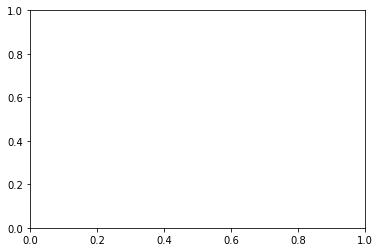

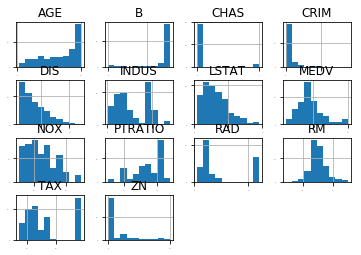

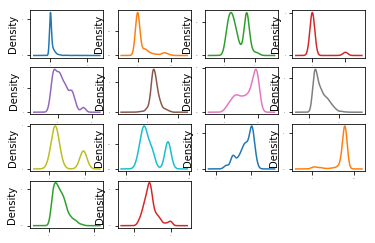

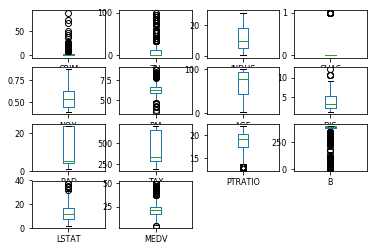

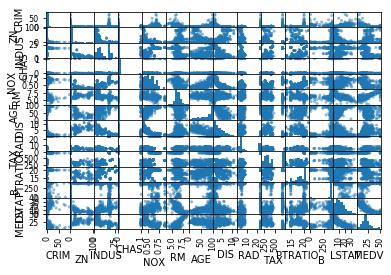

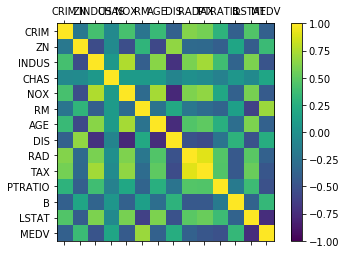

In [13]:
#Data Visualizations
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

# density
dataset.plot(kind= 'density' , subplots=True, layout=(4,4), sharex=False, legend=False,
    fontsize=1)
pyplot.show()

# box and whisker plots
dataset.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
    fontsize=8)
pyplot.show()

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
   
    
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation= 'none' )
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [15]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

LR: -21.37985572667868 (9.414263656984717)
LASSO: -26.423561108409643 (11.651109915777914)
EN: -27.50225935066171 (12.305022264112697)
KNN: -41.89648839024391 (13.901688149849864)
CART: -26.70137865853659 (10.586968303814649)
SVR: -85.51834183929131 (31.99479823184288)


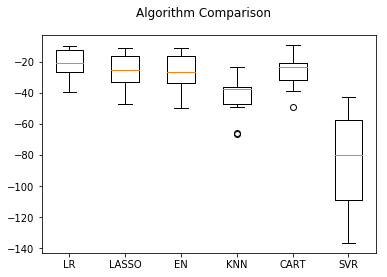

In [18]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =  'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(( 'LR' , LinearRegression()))
models.append(( 'LASSO' , Lasso()))
models.append(( 'EN' , ElasticNet()))
models.append(( 'KNN' , KNeighborsRegressor()))
models.append(( 'CART' , DecisionTreeRegressor()))
models.append(( 'SVR' , SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
  print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( 'Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ScaledLR: -21.379855726678564 (9.414263656984705)
ScaledLASSO: -26.607313557676616 (8.97876148589026)
ScaledEN: -27.932372158135518 (10.587490490139404)
ScaledKNN: -20.107620487804876 (12.376949150820472)
ScaledCART: -26.696921951219515 (12.297555561957259)
ScaledSVR: -29.633085500303213 (17.009186052351556)


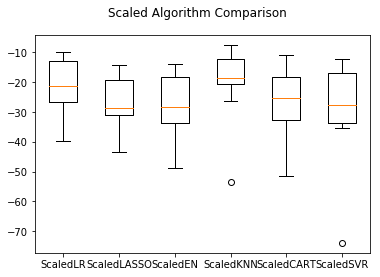

In [20]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LinearRegression())])))
pipelines.append(( 'ScaledLASSO' , Pipeline([( 'Scaler' , StandardScaler()),( 'LASSO' ,
    Lasso())])))
pipelines.append(( 'ScaledEN' , Pipeline([( 'Scaler' , StandardScaler()),( 'EN' ,
    ElasticNet())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsRegressor())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeRegressor())])))
pipelines.append(( 'ScaledSVR' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVR' , SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
  print(msg)
    
    
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
S